First do an Earthquake simulation 

In [3]:
%cd Simple1DOF

/home/tomsimpson/Documents/ETHwork/DynSub/Simple1DOF


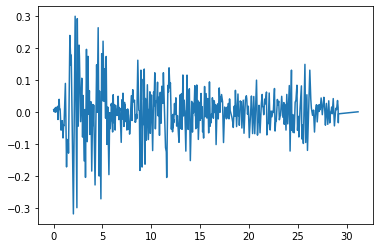

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.io import loadmat
from math import sqrt


os.getcwd()
Ag = loadmat('ElCentro.mat')
Ag = Ag['Ag']

plt.plot(Ag[:,0],Ag[:,1])



In [5]:
def f(y, t, params):
    y1, y2 = y
    k, c, m, knl, Ag, ts = params
    i = int(t/ts)
    ag=Ag[i,1]
    derivs=[y2,
           (-m*ag*9.81-knl*y1**3-k*y1-c*y2)/m]
    return derivs

tStop = 31.2
ts = 0.02
t = np.arange(0., tStop, ts)
nt = len(t)


np.random.seed(1)
#Parameters
k = (176.75+1224.1)*1e6
m = 1.75e6
c = 0.04*sqrt(k*m)
knl = 10e12
#knl=0
params=[k, c, m, knl, Ag, ts]

#Initial values
y1_0=0
y2_0=0
y0 = [y1_0, y2_0]

psoln = odeint(f, y0, t, args=(params,))

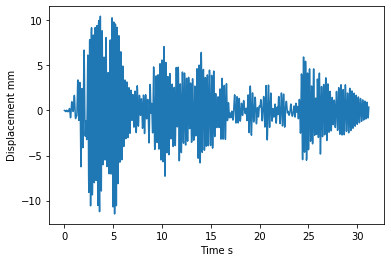

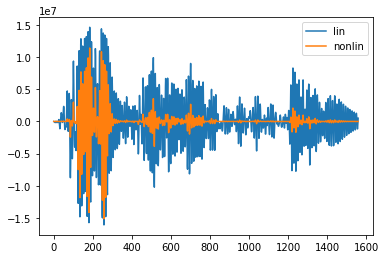

In [6]:
plt.figure(0)
plt.plot(Ag[:,0],1000*psoln[:,0])
plt.xlabel('Time s')
plt.ylabel('Displacement mm')

plt.figure(1)
plt.plot(k*psoln[:,0],label='lin')
plt.plot(knl*psoln[:,0]**3,label='nonlin')
plt.legend()

In [7]:
F_exp = -(psoln[:,0:1]**3)*10e12
ExInps = np.concatenate((Ag[:,1:],F_exp),axis=1)
X = psoln[:,0:1]


In [8]:
f_train = ExInps[0:1000,:]
f_test = ExInps[:,:]

x_train = X[0:1000,:]
x_test = X[:,:]

datasetTrain = np.concatenate((f_train,x_train),axis=1)
datasetTest=np.concatenate((f_test,x_test),axis=1)

def create_dataset(dataset, look_back=6):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 2:])
    return np.array(X), np.array(Y)

f_train, x_train = create_dataset(datasetTrain)
f_test, x_test = create_dataset(datasetTest)


0.9999981356033004
0.9999983449321715
1.1337927271810334e-07


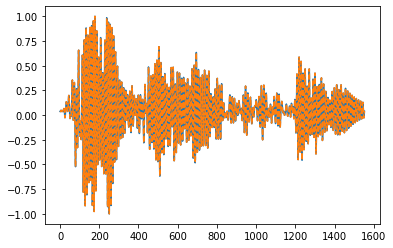

In [9]:
## One Step Ahead Prediction

f_train.shape
f_train = np.reshape(f_train,(f_train.shape[0],-1))
f_test = np.reshape(f_test,(f_test.shape[0],-1))
fmax=f_test.max(axis=0,keepdims=True)
fmin=f_test.min(axis=0,keepdims=True)
f_test_norm=2*(f_test-fmin)/(fmax-fmin)-1


xmax=x_test.max(axis=0,keepdims=True)
xmin=x_test.min(axis=0,keepdims=True)
x_test_norm=2*(x_test-xmin)/(xmax-xmin)-1

f_train_norm = f_test_norm[:1000,:]
x_train_norm = x_test_norm[:1000,:]



from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(f_train_norm, x_train_norm)
print(reg.score(f_train_norm,x_train_norm))
print(reg.score(f_test_norm,x_test_norm))

yy = reg.predict(f_test_norm)

plt.plot(yy)
plt.plot(x_test_norm,'--')

from sklearn.metrics import mean_squared_error
print(mean_squared_error(yy,x_test_norm))

18




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 22)                418       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 23        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________



Train on 1000 samples, validate on 1553 samples
Epoch 1/2000





1000/1000 [==============================] - 1s 897us/step - loss: 0.2858 - val_loss: 0.1615

Epoch 00001: val_loss improved from inf to 0.16151, saving model to .mdl_wts_nl.hdf5
Epoch 2/2000
1000/1000 [==============================] - 0s 22us/step - loss: 0.1911 - val_loss: 0.1048

Epoch 00002: val_loss improved from 0.16151 to 0.10476, saving model to .mdl_wts_nl.hdf5
Epoch 3/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.1219 - va

1000/1000 [==============================] - 0s 23us/step - loss: 0.0013 - val_loss: 8.2334e-04

Epoch 00026: val_loss improved from 0.00089 to 0.00082, saving model to .mdl_wts_nl.hdf5
Epoch 27/2000
1000/1000 [==============================] - 0s 23us/step - loss: 0.0012 - val_loss: 7.6088e-04

Epoch 00027: val_loss improved from 0.00082 to 0.00076, saving model to .mdl_wts_nl.hdf5
Epoch 28/2000
1000/1000 [==============================] - 0s 20us/step - loss: 0.0011 - val_loss: 7.0473e-04

Epoch 00028: val_loss improved from 0.00076 to 0.00070, saving model to .mdl_wts_nl.hdf5
Epoch 29/2000
1000/1000 [==============================] - 0s 20us/step - loss: 0.0010 - val_loss: 6.5420e-04

Epoch 00029: val_loss improved from 0.00070 to 0.00065, saving model to .mdl_wts_nl.hdf5
Epoch 30/2000
1000/1000 [==============================] - 0s 18us/step - loss: 9.5306e-04 - val_loss: 6.0863e-04

Epoch 00030: val_loss improved from 0.00065 to 0.00061, saving model to .mdl_wts_nl.hdf5
Epoch 31/2

1000/1000 [==============================] - 0s 21us/step - loss: 1.8001e-04 - val_loss: 1.1534e-04

Epoch 00066: val_loss improved from 0.00012 to 0.00012, saving model to .mdl_wts_nl.hdf5
Epoch 67/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.7571e-04 - val_loss: 1.1234e-04

Epoch 00067: val_loss improved from 0.00012 to 0.00011, saving model to .mdl_wts_nl.hdf5
Epoch 68/2000
1000/1000 [==============================] - 0s 34us/step - loss: 1.7167e-04 - val_loss: 1.0951e-04

Epoch 00068: val_loss improved from 0.00011 to 0.00011, saving model to .mdl_wts_nl.hdf5
Epoch 69/2000
1000/1000 [==============================] - 0s 35us/step - loss: 1.6785e-04 - val_loss: 1.0684e-04

Epoch 00069: val_loss improved from 0.00011 to 0.00011, saving model to .mdl_wts_nl.hdf5
Epoch 70/2000
1000/1000 [==============================] - 0s 28us/step - loss: 1.6425e-04 - val_loss: 1.0433e-04

Epoch 00070: val_loss improved from 0.00011 to 0.00010, saving model to .mdl_wts_nl

1000/1000 [==============================] - 0s 33us/step - loss: 9.3708e-05 - val_loss: 6.1765e-05

Epoch 00106: val_loss improved from 0.00006 to 0.00006, saving model to .mdl_wts_nl.hdf5
Epoch 107/2000
1000/1000 [==============================] - 0s 27us/step - loss: 9.2439e-05 - val_loss: 6.1132e-05

Epoch 00107: val_loss improved from 0.00006 to 0.00006, saving model to .mdl_wts_nl.hdf5
Epoch 108/2000
1000/1000 [==============================] - 0s 31us/step - loss: 9.1191e-05 - val_loss: 6.0505e-05

Epoch 00108: val_loss improved from 0.00006 to 0.00006, saving model to .mdl_wts_nl.hdf5
Epoch 109/2000
1000/1000 [==============================] - 0s 29us/step - loss: 8.9965e-05 - val_loss: 5.9884e-05

Epoch 00109: val_loss improved from 0.00006 to 0.00006, saving model to .mdl_wts_nl.hdf5
Epoch 110/2000
1000/1000 [==============================] - 0s 28us/step - loss: 8.8758e-05 - val_loss: 5.9267e-05

Epoch 00110: val_loss improved from 0.00006 to 0.00006, saving model to .mdl_wt

1000/1000 [==============================] - 0s 40us/step - loss: 5.7285e-05 - val_loss: 3.9496e-05

Epoch 00146: val_loss improved from 0.00004 to 0.00004, saving model to .mdl_wts_nl.hdf5
Epoch 147/2000
1000/1000 [==============================] - 0s 42us/step - loss: 5.6669e-05 - val_loss: 3.9046e-05

Epoch 00147: val_loss improved from 0.00004 to 0.00004, saving model to .mdl_wts_nl.hdf5
Epoch 148/2000
1000/1000 [==============================] - 0s 29us/step - loss: 5.6063e-05 - val_loss: 3.8603e-05

Epoch 00148: val_loss improved from 0.00004 to 0.00004, saving model to .mdl_wts_nl.hdf5
Epoch 149/2000
1000/1000 [==============================] - 0s 21us/step - loss: 5.5467e-05 - val_loss: 3.8167e-05

Epoch 00149: val_loss improved from 0.00004 to 0.00004, saving model to .mdl_wts_nl.hdf5
Epoch 150/2000
1000/1000 [==============================] - 0s 26us/step - loss: 5.4880e-05 - val_loss: 3.7736e-05

Epoch 00150: val_loss improved from 0.00004 to 0.00004, saving model to .mdl_wt

1000/1000 [==============================] - 0s 28us/step - loss: 3.8579e-05 - val_loss: 2.5902e-05

Epoch 00186: val_loss improved from 0.00003 to 0.00003, saving model to .mdl_wts_nl.hdf5
Epoch 187/2000
1000/1000 [==============================] - 0s 33us/step - loss: 3.8231e-05 - val_loss: 2.5656e-05

Epoch 00187: val_loss improved from 0.00003 to 0.00003, saving model to .mdl_wts_nl.hdf5
Epoch 188/2000
1000/1000 [==============================] - 0s 18us/step - loss: 3.7888e-05 - val_loss: 2.5413e-05

Epoch 00188: val_loss improved from 0.00003 to 0.00003, saving model to .mdl_wts_nl.hdf5
Epoch 189/2000
1000/1000 [==============================] - 0s 30us/step - loss: 3.7549e-05 - val_loss: 2.5174e-05

Epoch 00189: val_loss improved from 0.00003 to 0.00003, saving model to .mdl_wts_nl.hdf5
Epoch 190/2000
1000/1000 [==============================] - 0s 22us/step - loss: 3.7215e-05 - val_loss: 2.4939e-05

Epoch 00190: val_loss improved from 0.00003 to 0.00002, saving model to .mdl_wt

1000/1000 [==============================] - 0s 22us/step - loss: 2.7779e-05 - val_loss: 1.8404e-05

Epoch 00226: val_loss improved from 0.00002 to 0.00002, saving model to .mdl_wts_nl.hdf5
Epoch 227/2000
1000/1000 [==============================] - 0s 25us/step - loss: 2.7523e-05 - val_loss: 1.8332e-05

Epoch 00227: val_loss improved from 0.00002 to 0.00002, saving model to .mdl_wts_nl.hdf5
Epoch 228/2000
1000/1000 [==============================] - 0s 22us/step - loss: 2.7395e-05 - val_loss: 1.8129e-05

Epoch 00228: val_loss improved from 0.00002 to 0.00002, saving model to .mdl_wts_nl.hdf5
Epoch 229/2000
1000/1000 [==============================] - 0s 23us/step - loss: 2.7122e-05 - val_loss: 1.8089e-05

Epoch 00229: val_loss improved from 0.00002 to 0.00002, saving model to .mdl_wts_nl.hdf5
Epoch 230/2000
1000/1000 [==============================] - 0s 25us/step - loss: 2.7028e-05 - val_loss: 1.7862e-05

Epoch 00230: val_loss improved from 0.00002 to 0.00002, saving model to .mdl_wt

1000/1000 [==============================] - 0s 24us/step - loss: 3.5032e-05 - val_loss: 2.1005e-05

Epoch 00272: val_loss did not improve from 0.00002
Epoch 273/2000
1000/1000 [==============================] - 0s 25us/step - loss: 2.9559e-05 - val_loss: 2.5665e-05

Epoch 00273: val_loss did not improve from 0.00002
Epoch 274/2000
1000/1000 [==============================] - 0s 25us/step - loss: 3.3371e-05 - val_loss: 1.9548e-05

Epoch 00274: val_loss did not improve from 0.00002
Epoch 275/2000
1000/1000 [==============================] - 0s 19us/step - loss: 2.7807e-05 - val_loss: 2.3646e-05

Epoch 00275: val_loss did not improve from 0.00002
Epoch 276/2000
1000/1000 [==============================] - 0s 20us/step - loss: 3.1099e-05 - val_loss: 1.7839e-05

Epoch 00276: val_loss did not improve from 0.00002
Epoch 277/2000
1000/1000 [==============================] - 0s 21us/step - loss: 2.5729e-05 - val_loss: 2.1347e-05

Epoch 00277: val_loss did not improve from 0.00002
Epoch 278/200

1000/1000 [==============================] - 0s 25us/step - loss: 1.9943e-05 - val_loss: 1.5328e-05

Epoch 00320: val_loss did not improve from 0.00001
Epoch 321/2000
1000/1000 [==============================] - 0s 20us/step - loss: 1.9897e-05 - val_loss: 1.5352e-05

Epoch 00321: val_loss did not improve from 0.00001
Epoch 322/2000
1000/1000 [==============================] - 0s 21us/step - loss: 1.9875e-05 - val_loss: 1.5377e-05

Epoch 00322: val_loss did not improve from 0.00001
Epoch 323/2000
1000/1000 [==============================] - 0s 18us/step - loss: 1.9810e-05 - val_loss: 1.5394e-05

Epoch 00323: val_loss did not improve from 0.00001
Epoch 324/2000
1000/1000 [==============================] - 0s 21us/step - loss: 1.9778e-05 - val_loss: 1.5422e-05

Epoch 00324: val_loss did not improve from 0.00001
Epoch 325/2000
1000/1000 [==============================] - 0s 22us/step - loss: 1.9719e-05 - val_loss: 1.5429e-05

Epoch 00325: val_loss did not improve from 0.00001
Epoch 326/200

1000/1000 [==============================] - 0s 45us/step - loss: 4.6984e-05 - val_loss: 3.2228e-05

Epoch 00369: val_loss did not improve from 0.00001
Epoch 370/2000
1000/1000 [==============================] - 0s 70us/step - loss: 4.4665e-05 - val_loss: 1.4187e-05

Epoch 00370: val_loss did not improve from 0.00001
Epoch 371/2000
1000/1000 [==============================] - 0s 66us/step - loss: 2.9264e-05 - val_loss: 2.4593e-05

Epoch 00371: val_loss did not improve from 0.00001
Epoch 372/2000
1000/1000 [==============================] - 0s 33us/step - loss: 4.2831e-05 - val_loss: 1.5506e-05

Epoch 00372: val_loss did not improve from 0.00001
Epoch 373/2000
1000/1000 [==============================] - 0s 28us/step - loss: 2.3341e-05 - val_loss: 2.1843e-05

Epoch 00373: val_loss did not improve from 0.00001
Epoch 374/2000
1000/1000 [==============================] - 0s 26us/step - loss: 4.2795e-05 - val_loss: 2.3165e-05

Epoch 00374: val_loss did not improve from 0.00001
Epoch 375/200


Epoch 00415: val_loss did not improve from 0.00001
Epoch 416/2000
1000/1000 [==============================] - 0s 60us/step - loss: 1.1237e-05 - val_loss: 1.2605e-05

Epoch 00416: val_loss did not improve from 0.00001
Epoch 417/2000
1000/1000 [==============================] - 0s 35us/step - loss: 2.3463e-05 - val_loss: 1.4501e-05

Epoch 00417: val_loss did not improve from 0.00001
Epoch 418/2000
1000/1000 [==============================] - 0s 23us/step - loss: 2.0431e-05 - val_loss: 2.2500e-05

Epoch 00418: val_loss did not improve from 0.00001
Epoch 419/2000
1000/1000 [==============================] - 0s 20us/step - loss: 4.4381e-05 - val_loss: 2.4026e-05

Epoch 00419: val_loss did not improve from 0.00001
Epoch 420/2000
1000/1000 [==============================] - 0s 26us/step - loss: 3.8310e-05 - val_loss: 2.9595e-05

Epoch 00420: val_loss did not improve from 0.00001
Epoch 421/2000
1000/1000 [==============================] - 0s 19us/step - loss: 6.6141e-05 - val_loss: 6.9662e-0

1000/1000 [==============================] - 0s 27us/step - loss: 1.3396e-05 - val_loss: 1.0622e-05

Epoch 00464: val_loss did not improve from 0.00001
Epoch 465/2000
1000/1000 [==============================] - 0s 22us/step - loss: 1.2991e-05 - val_loss: 1.1038e-05

Epoch 00465: val_loss did not improve from 0.00001
Epoch 466/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.3426e-05 - val_loss: 1.3348e-05

Epoch 00466: val_loss did not improve from 0.00001
Epoch 467/2000
1000/1000 [==============================] - 0s 25us/step - loss: 1.5090e-05 - val_loss: 1.4448e-05

Epoch 00467: val_loss did not improve from 0.00001
Epoch 468/2000
1000/1000 [==============================] - 0s 21us/step - loss: 1.5891e-05 - val_loss: 1.2483e-05

Epoch 00468: val_loss did not improve from 0.00001
Epoch 469/2000
1000/1000 [==============================] - 0s 40us/step - loss: 1.4533e-05 - val_loss: 1.2371e-05

Epoch 00469: val_loss did not improve from 0.00001
Epoch 470/200

1000/1000 [==============================] - 0s 20us/step - loss: 7.5113e-06 - val_loss: 5.0103e-06

Epoch 00512: val_loss did not improve from 0.00000
Epoch 513/2000
1000/1000 [==============================] - 0s 20us/step - loss: 7.0483e-06 - val_loss: 4.9170e-06

Epoch 00513: val_loss did not improve from 0.00000
Epoch 514/2000
1000/1000 [==============================] - 0s 24us/step - loss: 7.3209e-06 - val_loss: 5.2195e-06

Epoch 00514: val_loss did not improve from 0.00000
Epoch 515/2000
1000/1000 [==============================] - 0s 21us/step - loss: 7.3924e-06 - val_loss: 5.4219e-06

Epoch 00515: val_loss did not improve from 0.00000
Epoch 516/2000
1000/1000 [==============================] - 0s 19us/step - loss: 7.7649e-06 - val_loss: 5.3534e-06

Epoch 00516: val_loss did not improve from 0.00000
Epoch 517/2000
1000/1000 [==============================] - 0s 23us/step - loss: 7.3830e-06 - val_loss: 5.3961e-06

Epoch 00517: val_loss did not improve from 0.00000
Epoch 518/200

1000/1000 [==============================] - 0s 23us/step - loss: 1.1602e-05 - val_loss: 9.1324e-06

Epoch 00561: val_loss did not improve from 0.00000
Epoch 562/2000
1000/1000 [==============================] - 0s 20us/step - loss: 1.2256e-05 - val_loss: 5.0700e-06

Epoch 00562: val_loss did not improve from 0.00000
Epoch 563/2000
1000/1000 [==============================] - 0s 21us/step - loss: 8.5077e-06 - val_loss: 4.5305e-06

Epoch 00563: val_loss did not improve from 0.00000
Epoch 564/2000
1000/1000 [==============================] - 0s 20us/step - loss: 7.2092e-06 - val_loss: 4.9799e-06

Epoch 00564: val_loss did not improve from 0.00000
Epoch 565/2000
1000/1000 [==============================] - 0s 26us/step - loss: 7.2355e-06 - val_loss: 3.5478e-06

Epoch 00565: val_loss improved from 0.00000 to 0.00000, saving model to .mdl_wts_nl.hdf5
Epoch 566/2000
1000/1000 [==============================] - 0s 17us/step - loss: 6.0708e-06 - val_loss: 5.2193e-06

Epoch 00566: val_loss did 

1000/1000 [==============================] - 0s 25us/step - loss: 1.0843e-05 - val_loss: 4.2705e-06

Epoch 00610: val_loss did not improve from 0.00000
Epoch 611/2000
1000/1000 [==============================] - 0s 25us/step - loss: 8.4936e-06 - val_loss: 4.9963e-06

Epoch 00611: val_loss did not improve from 0.00000
Epoch 612/2000
1000/1000 [==============================] - 0s 19us/step - loss: 9.1979e-06 - val_loss: 3.3939e-06

Epoch 00612: val_loss did not improve from 0.00000
Epoch 613/2000
1000/1000 [==============================] - 0s 22us/step - loss: 6.1781e-06 - val_loss: 4.0354e-06

Epoch 00613: val_loss did not improve from 0.00000
Epoch 614/2000
1000/1000 [==============================] - 0s 22us/step - loss: 7.1462e-06 - val_loss: 2.8784e-06

Epoch 00614: val_loss improved from 0.00000 to 0.00000, saving model to .mdl_wts_nl.hdf5
Epoch 615/2000
1000/1000 [==============================] - 0s 19us/step - loss: 4.4854e-06 - val_loss: 3.7499e-06

Epoch 00615: val_loss did 

1000/1000 [==============================] - 0s 20us/step - loss: 7.2373e-05 - val_loss: 6.4325e-06

Epoch 00659: val_loss did not improve from 0.00000
Epoch 660/2000
1000/1000 [==============================] - 0s 23us/step - loss: 1.7769e-05 - val_loss: 1.9833e-05

Epoch 00660: val_loss did not improve from 0.00000
Epoch 661/2000
1000/1000 [==============================] - 0s 24us/step - loss: 4.3746e-05 - val_loss: 5.1625e-06

Epoch 00661: val_loss did not improve from 0.00000
Epoch 662/2000
1000/1000 [==============================] - 0s 21us/step - loss: 8.0725e-06 - val_loss: 1.1366e-05

Epoch 00662: val_loss did not improve from 0.00000
Epoch 663/2000
1000/1000 [==============================] - 0s 19us/step - loss: 2.5508e-05 - val_loss: 3.4499e-06

Epoch 00663: val_loss did not improve from 0.00000
Epoch 664/2000
1000/1000 [==============================] - 0s 23us/step - loss: 6.8142e-06 - val_loss: 6.6023e-06

Epoch 00664: val_loss did not improve from 0.00000
Epoch 665/200

1000/1000 [==============================] - 0s 24us/step - loss: 6.4074e-05 - val_loss: 7.1658e-06

Epoch 00708: val_loss did not improve from 0.00000
Epoch 709/2000
1000/1000 [==============================] - 0s 26us/step - loss: 1.4414e-05 - val_loss: 1.3700e-05

Epoch 00709: val_loss did not improve from 0.00000
Epoch 710/2000
1000/1000 [==============================] - 0s 22us/step - loss: 3.4208e-05 - val_loss: 7.2181e-06

Epoch 00710: val_loss did not improve from 0.00000
Epoch 711/2000
1000/1000 [==============================] - 0s 21us/step - loss: 1.5196e-05 - val_loss: 7.1762e-06

Epoch 00711: val_loss did not improve from 0.00000
Epoch 712/2000
1000/1000 [==============================] - 0s 21us/step - loss: 1.6493e-05 - val_loss: 6.8624e-06

Epoch 00712: val_loss did not improve from 0.00000
Epoch 713/2000
1000/1000 [==============================] - 0s 20us/step - loss: 1.4358e-05 - val_loss: 5.3271e-06

Epoch 00713: val_loss did not improve from 0.00000
Epoch 714/200

1000/1000 [==============================] - 0s 24us/step - loss: 1.8036e-05 - val_loss: 1.2807e-05

Epoch 00757: val_loss did not improve from 0.00000
Epoch 758/2000
1000/1000 [==============================] - 0s 25us/step - loss: 2.9069e-05 - val_loss: 3.8779e-06

Epoch 00758: val_loss did not improve from 0.00000
Epoch 759/2000
1000/1000 [==============================] - 0s 20us/step - loss: 8.0051e-06 - val_loss: 1.0534e-05

Epoch 00759: val_loss did not improve from 0.00000
Epoch 760/2000
1000/1000 [==============================] - 0s 21us/step - loss: 2.4534e-05 - val_loss: 4.2213e-06

Epoch 00760: val_loss did not improve from 0.00000
Epoch 761/2000
1000/1000 [==============================] - 0s 19us/step - loss: 8.2362e-06 - val_loss: 8.7799e-06

Epoch 00761: val_loss did not improve from 0.00000
Epoch 762/2000
1000/1000 [==============================] - 0s 23us/step - loss: 1.9881e-05 - val_loss: 2.8061e-06

Epoch 00762: val_loss did not improve from 0.00000
Epoch 763/200

1000/1000 [==============================] - 0s 24us/step - loss: 7.8153e-06 - val_loss: 1.1007e-05

Epoch 00806: val_loss did not improve from 0.00000
Epoch 807/2000
1000/1000 [==============================] - 0s 41us/step - loss: 2.4990e-05 - val_loss: 5.6729e-06

Epoch 00807: val_loss did not improve from 0.00000
Epoch 808/2000
1000/1000 [==============================] - 0s 47us/step - loss: 1.0962e-05 - val_loss: 7.9915e-06

Epoch 00808: val_loss did not improve from 0.00000
Epoch 809/2000
1000/1000 [==============================] - 0s 55us/step - loss: 1.8056e-05 - val_loss: 4.6987e-06

Epoch 00809: val_loss did not improve from 0.00000
Epoch 810/2000
1000/1000 [==============================] - 0s 32us/step - loss: 1.0060e-05 - val_loss: 1.0089e-05

Epoch 00810: val_loss did not improve from 0.00000
Epoch 811/2000
1000/1000 [==============================] - 0s 25us/step - loss: 2.0630e-05 - val_loss: 6.5110e-06

Epoch 00811: val_loss did not improve from 0.00000
Epoch 812/200

1000/1000 [==============================] - 0s 41us/step - loss: 1.5969e-05 - val_loss: 6.5694e-06

Epoch 00855: val_loss did not improve from 0.00000
Epoch 856/2000
1000/1000 [==============================] - 0s 33us/step - loss: 1.3943e-05 - val_loss: 7.5483e-06

Epoch 00856: val_loss did not improve from 0.00000
Epoch 857/2000
1000/1000 [==============================] - 0s 24us/step - loss: 1.7105e-05 - val_loss: 1.1644e-05

Epoch 00857: val_loss did not improve from 0.00000
Epoch 858/2000
1000/1000 [==============================] - 0s 22us/step - loss: 2.0847e-05 - val_loss: 8.5808e-06

Epoch 00858: val_loss did not improve from 0.00000
Epoch 859/2000
1000/1000 [==============================] - 0s 24us/step - loss: 1.8933e-05 - val_loss: 7.0275e-06

Epoch 00859: val_loss did not improve from 0.00000
Epoch 860/2000
1000/1000 [==============================] - 0s 24us/step - loss: 1.4690e-05 - val_loss: 1.0392e-05

Epoch 00860: val_loss did not improve from 0.00000
Epoch 861/200

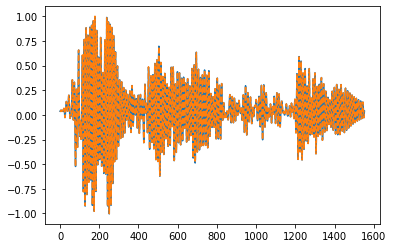

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import normalize





usualCallback = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience = 150)
checkpoint = ModelCheckpoint('.mdl_wts_nl.hdf5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 
callbacks_list = [usualCallback, checkpoint]

print(f_train.shape[1])

nn = Sequential()
nn.add(Dense(22,input_dim = f_train.shape[1], activation='tanh'))
nn.add(Dense(1,activation='linear'))
nn.compile(loss='mean_squared_error', optimizer='adam')
nn.summary()
#nn.load_weights('.mdl_wts_nl.hdf5')
nn.fit(f_train_norm,x_train_norm,validation_data=(f_test_norm,x_test_norm) ,epochs=2000, batch_size=64, callbacks=callbacks_list,shuffle=False)

nn.load_weights('.mdl_wts_nl.hdf5')
print(nn.evaluate(f_test_norm,x_test_norm))

yhat = nn.predict(f_test_norm)
plt.plot(yhat)
plt.plot(x_test_norm,'--')

print(mean_squared_error(yhat,x_test_norm))

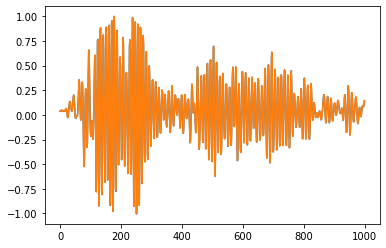

In [11]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
yhat = nn.predict(f_train_norm)
plt.plot(yhat)
plt.plot(x_train_norm)

0.08148060880523016


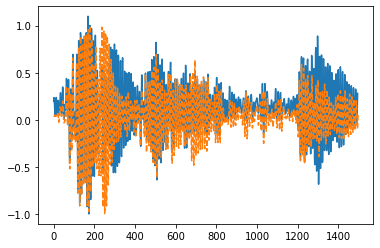

In [12]:
### Simulation with "Hybrid Test" i.e. at each time point the input given is the AR input + ground acceleration
### along with the exogenous forcing which is calculated from the "Physical System"

%matplotlib inline
import mpld3
mpld3.enable_notebook()


'''
def sim_pred(mdl, AG, X0, steps):
    Xhat = X0
    y = []
    Xstore = []
    for i in range(steps):
        #print(Xhat)
        Yhat = mdl.predict(Xhat)
        #RestForce = -Yhat*1224.1e6
        RestForce  = -Yhat
        #print(Yhat)
        y.append(Yhat)
        Xstore.append(Xhat)
        Xhat = Xhat[:,-3:]
        Xhat = np.concatenate((Xhat,AG[i+2:i+3,0:]),axis=1)
        Xhat = np.concatenate((Xhat,RestForce),axis=1)
        Xhat = np.concatenate((Xhat,Yhat),axis=1)   
        #print(Xhat.shape)
    
    
    return(y, Xstore)
'''

def sim_pred(mdl, AG, X0, steps):
    Xhat = X0
    y = []
    Xstore = []
    for i in range(steps):
        #print(Xhat)
        Yhat = mdl.predict(Xhat)
        #RestForce = -Yhat*1224.1e6
        RestForce  = -Yhat**3
        #print(Yhat)
        y.append(Yhat)
        Xstore.append(Xhat)
        Xhat = Xhat[:,-15:]
        Xhat = np.concatenate((Xhat,AG[i+2:i+3,0:]),axis=1)
        Xhat = np.concatenate((Xhat,RestForce),axis=1)
        Xhat = np.concatenate((Xhat,Yhat),axis=1)   
        #print(Xhat.shape)
    
    
    return(y, Xstore)
    

    
(y, Xstore)= sim_pred(nn, f_test_norm[:,0:1], f_train_norm[0:1,:], 1500)

Xstore = np.asarray(Xstore)
Xstore.shape
Xstore[0]

y = np.asarray(np.squeeze(y))
plt.plot(y[4:])
plt.plot(x_test_norm[:1498],'--')


print(mean_squared_error(y[4:],x_test_norm[:1496]))

#nn.save_weights('notbad.hdf5')

In [12]:
X0 = f_train[0:1,:]
#print(X0)
#print(Xstore[0])
print(f_train[1:2,:])
print(Xstore[1])
print(Ag.shape)

[[ 3.64000000e-03  1.46206320e+04 -1.19439849e-05  9.90000000e-04
   4.73670625e+04 -3.86954191e-05]]
[[ 0.04489558  0.0420696  -0.0420696   0.03630855  0.04611788 -0.04611788]]
(1560, 2)


[[ 3.64000000e-03  1.46206320e+04 -1.19439849e-05  9.90000000e-04
   4.73670625e+04 -3.86954191e-05]]
[[ 3.64000000e-03  1.46206324e+04 -1.19439853e-05  9.90000000e-04
   1.89547200e+06 -1.54846173e-03]]
0.0
[[ 0.05351501  0.04055207 -0.04055207  0.04489558  0.0420711  -0.0420711 ]]


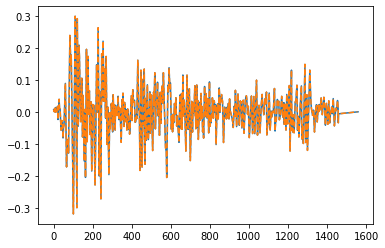

In [373]:
'''
X0 = f_train[0:1,:]
print(X0)
print(Xstore[0])
'''
print(f_train[1:2,:])
print(Xstore[1])

plt.plot(Ag[:,1])
#plt.plot(f_test[:,1])
plt.plot(f_test[:,0],'--')
print(mean_squared_error(f_test[:1000,0],Ag[:1000,1]))
print(f_train_norm[0:1,:])

In [22]:
X0 = f_train_norm[0:1,:]
yhat1 = nn.predict(X0)
print(yhat1)
print(x_train_norm[0])

X1 = f_train_norm[1:2,:]
print(X1)
X1hat = X1
X1hat[0,-1] = yhat1
X1hat[0,-2] = -yhat1
print(X1hat)

yhat2 = nn.predict(X1hat)
print(yhat2)
print(x_train_norm[1])

X2hat = f_train_norm[2:3,:]
X2hat[0,-1] = yhat2
X2hat[0, -2] = -yhat2

yhat3 = nn.predict(X2hat)
print(yhat3)
print(x_train_norm[2])


[[-0.04548717]]
[-0.04547331]
[[ 0.04489558  0.0420711  -0.0420711   0.03630855  0.04548717 -0.04548717]]
[[ 0.04489558  0.0420711  -0.0420711   0.03630855  0.04548717 -0.04548717]]
[[-0.04848266]]
[-0.048392]
[[-0.05038805]]
[-0.0500974]
